## In order to save the dataset in future on watson studio 

In [79]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='fd442326-8303-43df-b8b6-97435ea2eb14', project_access_token='p-b28041aa6e7a603ba2576d1652f541148108e9b9')
pc = project.project_context


# INSTALLING AND IMPORTING ALL THE IMPORTANT LIBRARIES

In [1]:
pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import csv
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
from sklearn.cluster import KMeans
import folium
import math
#import warnings
#warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


## scapping web page

In [3]:
pip install lxml

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install beautifulsoup4 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


# READING TABLES FROM WIKI AND CONVERTING INTO DATAFRAMES WITH HELP OF PANDAS

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [7]:
url = 'https://en.wikipedia.org/wiki/List_of_districts_in_India'
data = requests.get(url).text
soup = BeautifulSoup(data , 'lxml')
table = soup.find_all("table", class_="wikitable")
print(table)

[<table class="wikitable sortable">
<caption>No. of districts in each state or UT
</caption>
<tbody><tr>
<th bgcolor="#99ccff">Map key
</th>
<th bgcolor="#99ccff">Name of State or <i>Union Territory</i>
</th>
<th bgcolor="#99ccff">Number of Districts
</th>
<th bgcolor="#99ccff">Population<sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[4]</a></sup>
</th>
<th bgcolor="#99ccff">Population/district
</th></tr>
<tr>
<td>1</td>
<td><a href="/wiki/Andhra_Pradesh" title="Andhra Pradesh">Andhra Pradesh</a>
</td>
<td style="text-align: right;">13
</td>
<td style="text-align: right;">49,577,103
</td>
<td style="text-align: right;">3,813,623
</td></tr>
<tr>
<td>2</td>
<td><a href="/wiki/Arunachal_Pradesh" title="Arunachal Pradesh">Arunachal Pradesh</a>
</td>
<td style="text-align: right;">25
</td>
<td style="text-align: right;">1,383,727
</td>
<td style="text-align: right;">55,349
</td></tr>
<tr>
<td>3</td>
<td><a href="/wiki/Assam" title="Assam">Assam</a>
</td>
<td style="text-align

In [8]:
table_MN = pd.read_html('https://en.wikipedia.org/wiki/List_of_districts_in_India')

In [9]:
print(f'Total tables: {len(table_MN)}')

Total tables: 55


In [10]:
table_MN = pd.read_html('https://en.wikipedia.org/wiki/List_of_districts_in_India', match='No. of districts in each state or UT')
len(table_MN)

2

In [11]:
df = table_MN[0]
df.head()

,0,1,2,3,4
0,"A clickable map of the 28 states and 8 union territories of India No. of districts in each state or UT Map key Name of State or Union Territory Number of Districts Population[4] Population/district 1 Andhra Pradesh 13 49,577,103 3,813,623 2 Arunachal Pradesh 25 1,383,727 55,349 3 Assam 34 31,205,576 917,811 4 Bihar 38 104,099,452 2,739,459 5 Chhattisgarh 28 25,545,198 912,329 6 Goa 2 1,458,545 729,273 7 Gujarat 33 60,439,692 1,831,506 8 Haryana 22 25,351,462 1,152,339 9 Himachal Pradesh 12 6,864,602 572,050 10 Jharkhand 24 32,988,134 1,374,506 11 Karnataka 31 61,095,297 1,970,816 12 Kerala 14 33,406,061 2,386,147 13 Madhya Pradesh 52 72,626,809 1,396,669 14 Maharashtra 36 112,374,333 3,121,509 15 Manipur 16 2,570,390 160,649 16 Meghalaya 11 2,966,889 269,717 17 Mizoram 11 1,097,206 99,746 18 Nagaland 12 1,978,502 164,875 19 Odisha 30 41,974,218 1,399,141 20 Punjab 22 27,743,338 1,261,061 21 Rajasthan 33 68,548,437 2,077,225 22 Sikkim 4 610,577 152,644 23 Tamil Nadu 38 72,147,030 1,898,606 24 Telangana 33 35,003,674 1,060,717 25 Tripura 8 3,673,917 459,240 26 Uttar Pradesh 75 199,812,341 2,664,165 27 Uttarakhand 13 10,086,292 775,869 28 West Bengal 23 91,276,115 3,968,527 A Andaman and Nicobar Islands 3 380,581 126,860 B Chandigarh 1 1,055,450 1,055,450 C Dadra and Nagar Haveli and Daman and Diu 3 586,956 195,652 D Jammu and Kashmir 20 12,258,093 612,905 E Ladakh 2 290,492 145,246 F Lakshadweep 1 64,473 64,473 G Delhi 11 16,787,941 1,526,176 H Puducherry 4 1,247,953 311,988 36 Total 738 1,210,576,856 1,640,348",NaN,NaN,NaN,NaN
1,Map key,Name of State or Union Territory,Number of Districts,Population[4],Population/district
2,1,Andhra Pradesh,13,49577103,3813623
3,2,Arunachal Pradesh,25,1383727,55349
4,3,Assam,34,31205576,917811


In [12]:
df = table_MN[1]
df.head()

,Map key,Name of State or Union Territory,Number of Districts,Population[4],Population/district
0,1,Andhra Pradesh,13,49577103,3813623
1,2,Arunachal Pradesh,25,1383727,55349
2,3,Assam,34,31205576,917811
3,4,Bihar,38,104099452,2739459
4,5,Chhattisgarh,28,25545198,912329


# DATA PREPRATION (here i took a lot in preparing dataset which includes taking different tables and merging them into one, removing all unwanted datas , you can skip to cell number 138 if you dont want to waste time sorry for inconvenience caused!)

In [13]:
table_MN = pd.read_html('https://en.wikipedia.org/wiki/List_of_districts_in_India', attrs = {'class': 'wikitable'})
len(table_MN)

37

In [14]:
df = table_MN[36]
df.head()

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6]
0,1,KA,Karaikal,Karaikal,"200,222[35]",157[36],"1,275[37]"
1,2,MA,Mahé,Mahé,"41,816[38]",9[39],"4,646[38]"
2,3,PO,Puducherry,Pondicherry,"950,289[40]",293[41],"3,232[42]"
3,4,YA,Yanam,Yanam,"55,626[43]",30[44],"1,854[43]"


In [15]:
df0 = table_MN[0]

df0['State'] = 'Andhra Pradesh (AP)'
df0.head()

,Map key,Name of State or Union Territory,Number of Districts,Population[4],Population/district,State
0,1,Andhra Pradesh,13,49577103,3813623,Andhra Pradesh (AP)
1,2,Arunachal Pradesh,25,1383727,55349,Andhra Pradesh (AP)
2,3,Assam,34,31205576,917811,Andhra Pradesh (AP)
3,4,Bihar,38,104099452,2739459,Andhra Pradesh (AP)
4,5,Chhattisgarh,28,25545198,912329,Andhra Pradesh (AP)


In [16]:
df1 = table_MN[1]

df1['State'] = 'Andhra Pradesh (AP)'
df1.head(12)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,AN,Anantapur,Anantapur,4083315,19130,213,Andhra Pradesh (AP)
1,2,CH,Chittoor,Chittoor,4170468,15152,275,Andhra Pradesh (AP)
2,3,EG,East Godavari,Kakinada,5151549,10807,477,Andhra Pradesh (AP)
3,4,GU,Guntur,Guntur,4889230,11391,429,Andhra Pradesh (AP)
4,5,CU,Kadapa,Kadapa,2884524,15359,188,Andhra Pradesh (AP)
5,6,KR,Krishna,Vijayawada,4529009,8727,519,Andhra Pradesh (AP)
6,7,KU,Kurnool,Kurnool,4046601,17658,229,Andhra Pradesh (AP)
7,8,PR,Prakasam,Ongole,3392764,17626,192,Andhra Pradesh (AP)
8,9,NE,Sri Potti Sriramulu Nellore,Nellore,2966082,13076,227,Andhra Pradesh (AP)
9,10,SR,Srikakulam,Srikakulam,2699471,5837,462,Andhra Pradesh (AP)


In [17]:
df2 = table_MN[2]

df2['State'] = 'Arunachal Pradesh (AR)'
df2.head(12)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,AJ,Anjaw,Hawai,21089,6190,3,Arunachal Pradesh (AR)
1,2,CH,Changlang,Changlang,147951,4662,32,Arunachal Pradesh (AR)
2,3,EK,East Kameng,Seppa,78413,4134,19,Arunachal Pradesh (AR)
3,4,ES,East Siang,Pasighat,99019,3603,27,Arunachal Pradesh (AR)
4,5,– [Note 1],Kamle,Raga,22256,200,111,Arunachal Pradesh (AR)
5,6,– [Note 2],Kra Daadi,Jamin,–,–,–,Arunachal Pradesh (AR)
6,7,KK,Kurung Kumey,Koloriang,89717,6040,15,Arunachal Pradesh (AR)
7,8,– [Note 3],Lepa Rada,Basar,–,–,–,Arunachal Pradesh (AR)
8,9,EL,Lohit,Tezu,145538,2402,61,Arunachal Pradesh (AR)
9,10,LD,Longding,Longding,60000,1200,50,Arunachal Pradesh (AR)


In [18]:
df3 = table_MN[3]

df3['State'] = 'Assam (AS)'
df3.head(12)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,BK,Baksa,Mushalpur,953773,2008,475,Assam (AS)
1,2,- [Note 7],Bajali,Pathsala,253816,–,–,Assam (AS)
2,3,BP,Barpeta,Barpeta,1439806,–,–,Assam (AS)
3,4,BS [Note 1],Bishwanath,Biswanath Chariali,612491,1100,560,Assam (AS)
4,5,BO,Bongaigaon,Bongaigaon,732639,1724,425,Assam (AS)
5,6,CA,Cachar,Silchar,1736319,3786,459,Assam (AS)
6,7,CD [Note 2],Charaideo,Sonari,471418,1069,440,Assam (AS)
7,8,CH,Chirang,Kajalgaon,481818,1975,244,Assam (AS)
8,9,DR,Darrang,Mangaldoi,908090,1849,491,Assam (AS)
9,10,DM,Dhemaji,Dhemaji,688077,3237,213,Assam (AS)


In [19]:
df4 = table_MN[4]

df4['State'] = 'Bihar (BR)'
df4.head(12)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,AR,Araria,Araria,2806200,2829,992,Bihar (BR)
1,2,AR,Arwal,Arwal,700843,638,1098,Bihar (BR)
2,3,AU,Aurangabad,Aurangabad,2511243,3303,760,Bihar (BR)
3,4,BA,Banka,Banka,2029339,3018,672,Bihar (BR)
4,5,BE,Begusarai,Begusarai,2954367,1917,1540,Bihar (BR)
5,6,BG,Bhagalpur,Bhagalpur,3032226,2569,1180,Bihar (BR)
6,7,BJ,Bhojpur,Arrah,2720155,2473,1136,Bihar (BR)
7,8,BU,Buxar,Buxar,1707643,1624,1003,Bihar (BR)
8,9,DA,Darbhanga,Darbhanga,3921971,2278,1721,Bihar (BR)
9,10,EC,East Champaran,Motihari,5082868,3969,1281,Bihar (BR)


In [20]:
df5 = table_MN[5]

df5['State'] = 'Chhattisgarh (CG)'
df5.head(12)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,– [Note 1],Balod,Balod,826165,3527,234,Chhattisgarh (CG)
1,2,– [Note 2],Baloda Bazar,Baloda Bazar,1305343,4748,275,Chhattisgarh (CG)
2,3,– [Note 3],Balrampur,Balrampur,730491,3806,190,Chhattisgarh (CG)
3,4,BA,Bastar,Jagdalpur,834873,4030,210,Chhattisgarh (CG)
4,5,– [Note 4],Bemetara,Bemetara,795759,2855,270,Chhattisgarh (CG)
5,6,BJ,Bijapur,Bijapur,229832,6562,35,Chhattisgarh (CG)
6,7,BI,Bilaspur,Bilaspur,1961922,3508,460,Chhattisgarh (CG)
7,8,DA,Dantewada,Dantewada,533638,3411,59,Chhattisgarh (CG)
8,9,DH,Dhamtari,Dhamtari,799199,2029,394,Chhattisgarh (CG)
9,10,DU,Durg,Durg,1721726,2238,770,Chhattisgarh (CG)


In [115]:
df = table_MN[6]

df['State'] = 'Goa (GA)'
df.head(12)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,NG,North Goa,Panaji,817761,1736,471,Goa (GA)
1,2,SG,South Goa,Margao,639962,1966,326,Goa (GA)


In [23]:
df7 = table_MN[7]

df7['State'] = 'Gujarat (GJ)'
df7.head(12)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,AH,Ahmedabad,Ahmedabad,7208200,8707,890,Gujarat (GJ)
1,2,AM,Amreli,Amreli,1513614,6760,205,Gujarat (GJ)
2,3,AN,Anand,Anand,2090276,2942,711,Gujarat (GJ)
3,4,AR,Aravalli,Modasa,1051746,3217,327,Gujarat (GJ)
4,5,BK,Banaskantha,Palanpur,3116045,12703,290,Gujarat (GJ)
5,6,BR,Bharuch,Bharuch,1550822,6524,238,Gujarat (GJ)
6,7,BV,Bhavnagar,Bhavnagar,2877961,11155,288,Gujarat (GJ)
7,8,BT,Botad,Botad,656005,2564,256,Gujarat (GJ)
8,9,CU,Chhota Udepur,Chhota Udepur,1071831,3237,331,Gujarat (GJ)
9,10,DA,Dahod,Dahod,2126558,3642,582,Gujarat (GJ)


In [24]:
df8 = table_MN[8]

df8['State'] = 'Haryana (HR)'
df8.head(12)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,AM,Ambala,Ambala,1136784,1569,722,Haryana (HR)
1,2,BH,Bhiwani,Bhiwani,1629109,5140,341,Haryana (HR)
2,3,CD,Charkhi Dadri,Charkhi Dadri,502276,1370,367,Haryana (HR)
3,4,HR,Faridabad,Faridabad,1798954,783,2298,Haryana (HR)
4,5,FT,Fatehabad,Fatehabad,941522,2538,371,Haryana (HR)
5,6,GU,Gurgaon,Gurgaon,1514085,1258,1241,Haryana (HR)
6,7,HI,Hissar,Hissar,1742815,3788,438,Haryana (HR)
7,8,JH,Jhajjar,Jhajjar,956907,1868,522,Haryana (HR)
8,9,JI,Jind,Jind,1332042,2702,493,Haryana (HR)
9,10,KT,Kaithal,Kaithal,1072861,2799,467,Haryana (HR)


In [25]:
df9 = table_MN[9]

df9['State'] = 'Himachal Pradesh (HP)'
df9.head(12)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,BI,Bilaspur,Bilaspur,382056,1167,327,Himachal Pradesh (HP)
1,2,CH,Chamba,Chamba,518844,6528,80,Himachal Pradesh (HP)
2,3,HA,Hamirpur,Hamirpur,454293,1118,406,Himachal Pradesh (HP)
3,4,KA,Kangra,Dharamshala,1507223,5739,263,Himachal Pradesh (HP)
4,5,KI,Kinnaur,Reckong Peo,84298,6401,13,Himachal Pradesh (HP)
5,6,KU,Kullu,Kullu,437474,5503,79,Himachal Pradesh (HP)
6,7,LS,Lahaul and Spiti,Keylong,31528,13835,2,Himachal Pradesh (HP)
7,8,MA,Mandi,Mandi,999518,3950,253,Himachal Pradesh (HP)
8,9,SH,Shimla,Shimla,813384,5131,159,Himachal Pradesh (HP)
9,10,SI,Sirmaur,Nahan,530164,2825,188,Himachal Pradesh (HP)


In [26]:
df10 = table_MN[10]

df10['State'] = 'Jharkhand (JH)'
df10.head(12)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,BO,Bokaro,Bokaro,2061918,2861,716,Jharkhand (JH)
1,2,CH,Chatra,Chatra,1042304,3700,275,Jharkhand (JH)
2,3,DE,Deoghar,Deoghar,1491879,2479,602,Jharkhand (JH)
3,4,DH,Dhanbad,Dhanbad,2682662,2075,1284,Jharkhand (JH)
4,5,DU,Dumka,Dumka,1321096,4404,300,Jharkhand (JH)
5,6,ES,East Singhbhum,Jamshedpur,2291032,3533,648,Jharkhand (JH)
6,7,GA,Garhwa,Garhwa,1322387,4064,327,Jharkhand (JH)
7,8,GI,Giridih,Giridih,2445203,4887,497,Jharkhand (JH)
8,9,GO,Godda,Godda,1311382,2110,622,Jharkhand (JH)
9,10,GU,Gumla,Gumla,1025656,5327,193,Jharkhand (JH)


In [27]:
df11 = table_MN[11]

df11['State'] = 'Karnataka (KA)'
df11.head(12)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,BK,Bagalkot,Bagalkot,1890826,6583,288,Karnataka (KA)
1,2,BL,Ballari,Ballari,1400970,4252,330,Karnataka (KA)
2,3,BG,Belgaum,Belgaum,4778439,13415,356,Karnataka (KA)
3,4,BR,Bangalore Rural,Bangalore,987257,2239,441,Karnataka (KA)
4,5,BN,Bangalore Urban,Bangalore,9588910,2190,4378,Karnataka (KA)
5,6,BD,Bidar,Bidar,1700018,5448,312,Karnataka (KA)
6,7,BJ,Bijapur,Bijapur,2175102,10517,207,Karnataka (KA)
7,8,CJ,Chamarajanagara,Chamarajanagara,1020962,5102,200,Karnataka (KA)
8,9,CK,Chikkaballapura,Chikkaballapura,1254377,4208,298,Karnataka (KA)
9,10,CK,Chikmagalur,Chikmagalur,1137753,7201,158,Karnataka (KA)


In [28]:
df12 = table_MN[12]

df12['State'] = 'Kerala (KL)'
df12.head(12)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2)[14],Density (/km2)[6],State
0,1,AL,Alappuzha,Alappuzha,2121943,1415,1501,Kerala (KL)
1,2,ER,Ernakulam,Kakkanad,3279860,3063,1069,Kerala (KL)
2,3,ID,Idukki,Painavu,1107453,4356,254,Kerala (KL)
3,4,KN,Kannur,Kannur,2525637,2961,852,Kerala (KL)
4,5,KS,Kasaragod,Kasaragod,1302600,1989,654,Kerala (KL)
5,6,KL,Kollam,Kollam,2629703,2483,1056,Kerala (KL)
6,7,KT,Kottayam,Kottayam,1979384,2206,896,Kerala (KL)
7,8,KZ,Kozhikode,Kozhikode,3089543,2345,1318,Kerala (KL)
8,9,MA,Malappuram,Malappuram,4110956,3554,1058,Kerala (KL)
9,10,PL,Palakkad,Palakkad,2810892,4482,627,Kerala (KL)


In [29]:
df13 = table_MN[13]

df13['State'] = 'Madhya Pradesh (MP)'
df13.head(12)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,AG,Agar Malwa,Agar,571275,2785,205,Madhya Pradesh (MP)
1,2,AL,Alirajpur,Alirajpur,728677,3182,229,Madhya Pradesh (MP)
2,3,AP,Anuppur,Anuppur,749521,3747,200,Madhya Pradesh (MP)
3,4,AS,Ashok Nagar,Ashok Nagar,844979,4674,181,Madhya Pradesh (MP)
4,5,BL,Balaghat,Balaghat,1701156,9229,184,Madhya Pradesh (MP)
5,6,BR,Barwani,Barwani,1385659,5432,256,Madhya Pradesh (MP)
6,7,BE,Betul,Betul,1575247,10043,157,Madhya Pradesh (MP)
7,8,BD,Bhind,Bhind,1703562,4459,382,Madhya Pradesh (MP)
8,9,BP,Bhopal,Bhopal,2368145,2772,854,Madhya Pradesh (MP)
9,10,BU,Burhanpur,Burhanpur,756993,3427,221,Madhya Pradesh (MP)


In [30]:
df14 = table_MN[14]

df14['State'] = 'Maharashtra (MH)'
df14.head(12)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,AH,Ahmednagar,Ahmednagar,4543083,17048,266,Maharashtra (MH)
1,2,AK,Akola,Akola,1818617,5429,321,Maharashtra (MH)
2,3,AM,Amravati,Amravati,2887826,12235,237,Maharashtra (MH)
3,4,AU,Aurangabad,Aurangabad,3695928,10107,365,Maharashtra (MH)
4,5,BI,Beed,Beed,2585962,10693,242,Maharashtra (MH)
5,6,BH,Bhandara,Bhandara,1198810,3890,293,Maharashtra (MH)
6,7,BU,Buldhana,Buldhana,2588039,9661,268,Maharashtra (MH)
7,8,CH,Chandrapur,Chandrapur,2194262,11443,192,Maharashtra (MH)
8,9,DH,Dhule,Dhule,2048781,8095,285,Maharashtra (MH)
9,10,GA,Gadchiroli,Gadchiroli,1071795,14412,74,Maharashtra (MH)


In [31]:
df15 = table_MN[15]

df15['State'] = 'Manipur (MN)'
df15.head(12)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,BPR,Bishnupur,Bishnupur,240363,496,415,Manipur (MN)
1,2,CDL,Chandel,Chandel,144028,3317,37,Manipur (MN)
2,3,CCpr,Churachandpur,Churachandpur,271274,4574,50,Manipur (MN)
3,4,IE,Imphal East,Porompat,452661,710,555,Manipur (MN)
4,5,IW,Imphal West,Lamphelpat,514683,519,847,Manipur (MN)
5,6,JBM,Jiribam,Jiribam,43818,232,190,Manipur (MN)
6,7,KAK,Kakching,Kakching,135481,–,–,Manipur (MN)
7,8,KJ,Kamjong,Kamjong,45616,2000,23,Manipur (MN)
8,9,KPI,Kangpokpi,Kangpokpi,193744,1698,–,Manipur (MN)
9,10,NL,Noney,Noney (Longmai),–,–,–,Manipur (MN)


In [32]:
df16 = table_MN[16]

df16['State'] = 'Meghalaya (ML)'
df16.head(12)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,EG,East Garo Hills,Williamnagar,317618,2603,121,Meghalaya (ML)
1,2,EK,East Khasi Hills,Shillong,824059,2752,292,Meghalaya (ML)
2,3,–,East Jaintia Hills,Khliehriat,122436,2115,58,Meghalaya (ML)
3,4,–,North Garo Hills,Resubelpara,118325,1113,106,Meghalaya (ML)
4,5,RB,Ri Bhoi,Nongpoh,258380,2378,109,Meghalaya (ML)
5,6,SG,South Garo Hills,Baghmara,142574,1850,77,Meghalaya (ML)
6,7,–,South West Garo Hills,Ampati,172495,822,210,Meghalaya (ML)
7,8,–,South West Khasi Hills,Mawkyrwat,110152,1341,82,Meghalaya (ML)
8,9,WG,West Jaintia Hills,Jowai,270352,1693,160,Meghalaya (ML)
9,10,WG,West Garo Hills,Tura,642923,3714,173,Meghalaya (ML)


In [33]:
df17 = table_MN[17]

df17['State'] = 'Mizoram (MZ)'
df17.head(12)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,AI,Aizawl,Aizawl,404054,3577,113,Mizoram (MZ)
1,2,CH,Champhai,Champhai,125370,3168,39,Mizoram (MZ)
2,3,-,Hnahthial,Hnahthial,–,–,–,Mizoram (MZ)
3,4,-,Khawzawl,Khawzawl,–,–,–,Mizoram (MZ)
4,5,KO,Kolasib,Kolasib,83054,1386,60,Mizoram (MZ)
5,6,LA,Lawngtlai,Lawngtlai,117444,2519,46,Mizoram (MZ)
6,7,LU,Lunglei,Lunglei,154094,4572,34,Mizoram (MZ)
7,8,MA,Mamit,Mamit,85757,2967,28,Mizoram (MZ)
8,9,SA,Saiha,Saiha,56366,1414,40,Mizoram (MZ)
9,10,-,Saitual,Saitual,–,–,–,Mizoram (MZ)


In [34]:
df18 = table_MN[18]

df18['State'] = 'Nagaland (NL)'
df18.head(5)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,DI,Dimapur,Dimapur,379769,926,410,Nagaland (NL)
1,2,KI,Kiphire,Kiphire,74033,1255,66,Nagaland (NL)
2,3,KO,Kohima,Kohima,270063,1041,213,Nagaland (NL)
3,4,LO,Longleng,Longleng,50593,885,89,Nagaland (NL)
4,5,MK,Mokokchung,Mokokchung,193171,1615,120,Nagaland (NL)


In [35]:
df19 = table_MN[19]

df19['State'] = 'Odisha (OR)'
df19.head(5)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,AN,Angul,Angul,1271703,6232.0,199,Odisha (OR)
1,2,BD,Boudh (Bauda),Boudh,439917,3098.0,142,Odisha (OR)
2,3,BH,Bhadrak,Bhadrak,1506522,2505.0,601,Odisha (OR)
3,4,BL,Balangir,Balangir,1648574,6575.0,251,Odisha (OR)
4,5,BR,Bargarh (Baragarh),Bargarh,1478833,5837.0,253,Odisha (OR)


In [36]:
df20 = table_MN[20]

df20['State'] = 'Punjab (PB)'
df20.head(5)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,AM,Amritsar,Amritsar,2490891,2673,932,Punjab (PB)
1,2,BNL,Barnala,Barnala,596294,1423,419,Punjab (PB)
2,3,BA,Bathinda,Bathinda,1388859,3355,414,Punjab (PB)
3,4,FI,Firozpur,Firozpur,2026831,5334,380,Punjab (PB)
4,5,FR,Faridkot,Faridkot,618008,1472,424,Punjab (PB)


In [37]:
df21 = table_MN[21]

df21['State'] = 'Rajasthan (RJ)'
df21.head(5)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,AJ,Ajmer,Ajmer,2584913,8481,305,Rajasthan (RJ)
1,2,AL,Alwar,Alwar,3671999,8380,438,Rajasthan (RJ)
2,3,BI,Bikaner,Bikaner,2367745,27244,78,Rajasthan (RJ)
3,4,BM,Barmer,Barmer,2604453,28387,92,Rajasthan (RJ)
4,5,BN,Banswara,Banswara,1798194,5037,399,Rajasthan (RJ)


In [38]:
df22 = table_MN[22]

df22['State'] = 'Sikkim (SK)'
df22.head(5)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,ES,East Sikkim,Gangtok,281293,954,295,Sikkim (SK)
1,2,NS,North Sikkim,Mangan,43354,4226,10,Sikkim (SK)
2,3,SS,South Sikkim,Namchi,146742,750,196,Sikkim (SK)
3,4,WS,West Sikkim,Gyalshing,136299,1166,117,Sikkim (SK)


In [39]:
df23 = table_MN[23]

df23['State'] = 'Tamil Nadu (TN)'
df23.head(5)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,AY,Ariyalur,Ariyalur,752481,3208,387,Tamil Nadu (TN)
1,2,CGL,Chengalpattu,Chengalpattu,2556244,2945,868,Tamil Nadu (TN)
2,3,CH,Chennai,Chennai,7100000,426,17000,Tamil Nadu (TN)
3,4,CO,Coimbatore,Coimbatore,3472578,7469,748,Tamil Nadu (TN)
4,5,CU,Cuddalore,Cuddalore,2600880,3999,702,Tamil Nadu (TN)


In [40]:
df24 = table_MN[24]

df24['State'] = 'Telangana (TG)'
df24.head(5)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,AD,Adilabad,Adilabad,708952,4185.97,171,Telangana (TG)
1,2,–,Komaram Bheem,Asifabad,515835,4300.16,106,Telangana (TG)
2,3,–,Bhadradri Kothagudem,Kothagudem,1304811,8951.00,143,Telangana (TG)
3,4,HY,Hyderabad,Hyderabad,3441992,4325.29,18172,Telangana (TG)
4,5,–,Jagtial,Jagtial,983414,3043.23,407,Telangana (TG)


In [41]:
df25 = table_MN[25]

df25['State'] = 'Tripura (TR)'
df25.head(5)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,DH,Dhalai,Ambassa,377988,2400.00,157,Tripura (TR)
1,2,GM,Gomati,"Udaipur, Tripura",436868,1522.80,287,Tripura (TR)
2,3,KH,Khowai[16],Khowai,327391,1005.67,326,Tripura (TR)
3,4,NT,North Tripura,Dharmanagar,415946,1444.50,288,Tripura (TR)
4,5,SP,Sepahijala[17],Bishramganj,484233,1044.78,463,Tripura (TR)


In [42]:
df26 = table_MN[26]

df26['State'] = 'Uttar Pradesh (UP)'
df26.head(5)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,AG,Agra,Agra,4380793,4027,1084,Uttar Pradesh (UP)
1,2,AL,Aligarh,Aligarh,3673849,3747,1007,Uttar Pradesh (UP)
2,3,AH,Allahabad,Allahabad,5959798,5481,1087,Uttar Pradesh (UP)
3,4,AN,Ambedkar Nagar,Akbarpur,2398709,2372,1021,Uttar Pradesh (UP)
4,5,AM,Amethi,Gauriganj,2549935,3063,830,Uttar Pradesh (UP)


In [43]:
df27 = table_MN[27]

df27['State'] = 'Uttarakhand (UK)'
df27.head(5)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,AL,Almora,Almora,621927,3090,198,Uttarakhand (UK)
1,2,BA,Bageshwar,Bageshwar,259840,2310,116,Uttarakhand (UK)
2,3,CL,Chamoli,Gopeshwar,391114,7692,49,Uttarakhand (UK)
3,4,CP,Champawat,Champawat,259315,1781,147,Uttarakhand (UK)
4,5,DD,Dehradun,Dehradun,1698560,3088,550,Uttarakhand (UK)


In [44]:
df28 = table_MN[28]

df28['State'] = 'West Bengal (WB)'
df28.head(5)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,AD,Alipurduar,Alipurduar,1501983,3136.0,479,West Bengal (WB)
1,2,BN,Bankura,Bankura,3596292,6882.0,523,West Bengal (WB)
2,3,BR,Paschim Bardhaman,Asansol,2882031,1603.0,1798,West Bengal (WB)
3,4,BR,Purba Bardhaman,Bardhaman,4835532,5433.0,890,West Bengal (WB)
4,5,BI,Birbhum,Suri,3502387,4545.0,771,West Bengal (WB)


In [45]:
df29 = table_MN[29]

df29['State'] = 'Andaman and Nicobar (AN)'
df29.head(5)

,#,Code[5],District[6],Headquarters,Population (2011)[20],Area (km2)[21],Density (/km2)[6][22],State
0,1,NI,Nicobar,Car Nicobar,36842,1841,20,Andaman and Nicobar (AN)
1,2,NaN,North and Middle Andaman,Mayabunder,105597,3736,28,Andaman and Nicobar (AN)
2,3,SA,South Andaman,Port Blair,238142,2672,89,Andaman and Nicobar (AN)


In [46]:
df30 = table_MN[30]

df30['State'] = 'Chandigarh (CH)'
df30.head(5)

,#,Code[5],District,Headquarters,Population (2011)[6][23],Area (km2)[24],Density (/km2)[6][25],State
0,1,CH,Chandigarh,Chandigarh,1055450,114,9258,Chandigarh (CH)


In [47]:
df31 = table_MN[31]

df31['State'] = 'Dadra and Nagar Haveli and Daman and Diu (DD)'
df31.head(5)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,DA,Daman,Daman,"191,173[26]",72[27],2651,Dadra and Nagar Haveli and Daman and Diu (DD)
1,2,DI,Diu,Diu,"52,074[28]",39[29],2058,Dadra and Nagar Haveli and Daman and Diu (DD)
2,3,DN,Dadra and Nagar Haveli,Silvassa,343709,491,700,Dadra and Nagar Haveli and Daman and Diu (DD)


In [48]:
df32 = table_MN[32]

df32['State'] = 'Jammu and Kashmir (JK)'
df32.head(5)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,AN,Anantnag,Anantnag,1070144,2853,375,Jammu and Kashmir (JK)
1,2,BD,Budgam,Budgam,735753,1406,537,Jammu and Kashmir (JK)
2,3,BPR,Bandipora,Bandipore,385099,3010,128,Jammu and Kashmir (JK)
3,4,BR,Baramulla,Baramulla,1015503,3329,305,Jammu and Kashmir (JK)
4,5,DO,Doda,Doda,409576,2625,79,Jammu and Kashmir (JK)


In [49]:
df33 = table_MN[33]

df33['State'] = 'Ladakh (LA)'
df33.head(5)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,KR,Kargil,Kargil,143388,14036,10,Ladakh (LA)
1,2,LE,Leh,Leh,133487,45110,3,Ladakh (LA)


In [50]:
df34 = table_MN[34]

df34['State'] = 'Lakshadweep (LD)'
df34.head(5)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,LD,Lakshadweep,Kavaratti,"64,473[30]",30[31],"2,149[32]",Lakshadweep (LD)


In [51]:
df35 = table_MN[35]

df35['State'] = 'National Capital Territory of Delhi (DL)'
df35.head(5)

,#,Code[5],District[6],Headquarters,Population (2011)[33],Area (km2)[citation needed],Density (/km2)[6][34],State
0,1,CD,Central Delhi,Daryaganj,582320,25.0,27730,National Capital Territory of Delhi (DL)
1,2,ED,East Delhi,Preet Vihar,1709346,440.0,27132,National Capital Territory of Delhi (DL)
2,3,ND,New Delhi,Connaught Place,142004,22.0,4057,National Capital Territory of Delhi (DL)
3,4,NO,North Delhi,Sadar Bazaar,887978,59.0,14557,National Capital Territory of Delhi (DL)
4,5,NE,North East Delhi,Seelampur,2241624,52.0,36155,National Capital Territory of Delhi (DL)


In [52]:
df36 = table_MN[36]

df36['State'] = 'Puducherry (PY)'
df36.head(5)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,1,KA,Karaikal,Karaikal,"200,222[35]",157[36],"1,275[37]",Puducherry (PY)
1,2,MA,Mahé,Mahé,"41,816[38]",9[39],"4,646[38]",Puducherry (PY)
2,3,PO,Puducherry,Pondicherry,"950,289[40]",293[41],"3,232[42]",Puducherry (PY)
3,4,YA,Yanam,Yanam,"55,626[43]",30[44],"1,854[43]",Puducherry (PY)


In [116]:
pdList = [df1, df2, df3 ,df4 ,df5 ,df6,df7 ,df8 ,df9 ,df10 ,df11 ,df12 ,df13 ,df14 ,df15 ,df16 ,df17 ,df18 ,df19 ,df20 ,df21 ,df22 ,df23 ,df24 ,df25 ,df26 ,df27 ,df28 ,df29 ,df30 ,df31 ,df32 ,df33 ,df34 ,df35 ,df36]  # List of your dataframes
new_df = pd.concat(pdList , ignore_index=True)

In [149]:
new_df

,State,Code,District,Headquarters,Population,Area,Density,Latitude,Longitude
0,Andhra Pradesh (AP),AN,Anantapur,Anantapur,4083315.0,19130.00,213.0,14.678322,77.606504
1,Andhra Pradesh (AP),CH,Chittoor,Chittoor,4170468.0,15152.00,275.0,13.215835,79.097129
2,Andhra Pradesh (AP),EG,East Godavari,Kakinada,5151549.0,10807.00,477.0,16.943739,82.235061
3,Andhra Pradesh (AP),GU,Guntur,Guntur,4889230.0,11391.00,429.0,16.291519,80.454159
4,Andhra Pradesh (AP),CU,Kadapa,Kadapa,2884524.0,15359.00,188.0,14.465612,78.816408
5,Andhra Pradesh (AP),KR,Krishna,Vijayawada,4529009.0,8727.00,519.0,16.508759,80.618510
6,Andhra Pradesh (AP),KU,Kurnool,Kurnool,4046601.0,17658.00,229.0,15.830925,78.042537
7,Andhra Pradesh (AP),PR,Prakasam,Ongole,3392764.0,17626.00,192.0,15.505859,80.050029
8,Andhra Pradesh (AP),NE,Sri Potti Sriramulu Nellore,Nellore,2966082.0,13076.00,227.0,14.449372,79.987376
9,Andhra Pradesh (AP),SR,Srikakulam,Srikakulam,2699471.0,5837.00,462.0,18.294940,83.893875


In [118]:
new_df = new_df.rename(columns={'Population(2011)': 'Population', 'Area(km2)': 'Area', 'Density(/km2)': 'Density'})
new_df.head(20)

,#,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State,Area (km2)[14],Population (2011)[20],Area (km2)[21],Density (/km2)[6][22],District,Population (2011)[6][23],Area (km2)[24],Density (/km2)[6][25],Population (2011)[33],Area (km2)[citation needed],Density (/km2)[6][34]
0,1,AN,Anantapur,Anantapur,4083315,19130,213,Andhra Pradesh (AP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,CH,Chittoor,Chittoor,4170468,15152,275,Andhra Pradesh (AP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,EG,East Godavari,Kakinada,5151549,10807,477,Andhra Pradesh (AP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,GU,Guntur,Guntur,4889230,11391,429,Andhra Pradesh (AP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,CU,Kadapa,Kadapa,2884524,15359,188,Andhra Pradesh (AP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,KR,Krishna,Vijayawada,4529009,8727,519,Andhra Pradesh (AP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,KU,Kurnool,Kurnool,4046601,17658,229,Andhra Pradesh (AP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,PR,Prakasam,Ongole,3392764,17626,192,Andhra Pradesh (AP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NE,Sri Potti Sriramulu Nellore,Nellore,2966082,13076,227,Andhra Pradesh (AP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,SR,Srikakulam,Srikakulam,2699471,5837,462,Andhra Pradesh (AP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
new_df.drop(new_df.columns[[8]], axis=1, inplace=True)

In [120]:
new_df.drop(new_df.columns[[8]], axis=1, inplace=True)

In [121]:
new_df.drop(new_df.columns[[8]], axis=1, inplace=True)

In [122]:
new_df.drop(new_df.columns[[8]], axis=1, inplace=True)

In [123]:
new_df.drop(new_df.columns[[8]], axis=1, inplace=True)

In [124]:
new_df.drop(new_df.columns[[8]], axis=1, inplace=True)

In [125]:
new_df.drop(new_df.columns[[8]], axis=1, inplace=True)

In [126]:
new_df.drop(new_df.columns[[8]], axis=1, inplace=True)

In [127]:
new_df.drop(new_df.columns[[8]], axis=1, inplace=True)

In [128]:
new_df.drop(new_df.columns[[8]], axis=1, inplace=True)

In [129]:
new_df.drop(new_df.columns[[8]], axis=1, inplace=True)

In [130]:
new_df.drop(['#'], axis = 1)

,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6],State
0,AN,Anantapur,Anantapur,4083315,19130,213,Andhra Pradesh (AP)
1,CH,Chittoor,Chittoor,4170468,15152,275,Andhra Pradesh (AP)
2,EG,East Godavari,Kakinada,5151549,10807,477,Andhra Pradesh (AP)
3,GU,Guntur,Guntur,4889230,11391,429,Andhra Pradesh (AP)
4,CU,Kadapa,Kadapa,2884524,15359,188,Andhra Pradesh (AP)
5,KR,Krishna,Vijayawada,4529009,8727,519,Andhra Pradesh (AP)
6,KU,Kurnool,Kurnool,4046601,17658,229,Andhra Pradesh (AP)
7,PR,Prakasam,Ongole,3392764,17626,192,Andhra Pradesh (AP)
8,NE,Sri Potti Sriramulu Nellore,Nellore,2966082,13076,227,Andhra Pradesh (AP)
9,SR,Srikakulam,Srikakulam,2699471,5837,462,Andhra Pradesh (AP)


In [131]:
new_df = new_df[['State','Code[5]', 'District[6]','Headquarters', 'Population (2011)','Area (km2)','Density (/km2)[6]']]
new_df.head()

,State,Code[5],District[6],Headquarters,Population (2011),Area (km2),Density (/km2)[6]
0,Andhra Pradesh (AP),AN,Anantapur,Anantapur,4083315,19130,213
1,Andhra Pradesh (AP),CH,Chittoor,Chittoor,4170468,15152,275
2,Andhra Pradesh (AP),EG,East Godavari,Kakinada,5151549,10807,477
3,Andhra Pradesh (AP),GU,Guntur,Guntur,4889230,11391,429
4,Andhra Pradesh (AP),CU,Kadapa,Kadapa,2884524,15359,188


In [132]:
new_df = new_df.rename(columns={'Population (2011)': 'Population','Code[5]': 'Code' , 'Area (km2)': 'Area', 'Density (/km2)[6]': 'Density'})
new_df.head()

,State,Code,District[6],Headquarters,Population,Area,Density
0,Andhra Pradesh (AP),AN,Anantapur,Anantapur,4083315,19130,213
1,Andhra Pradesh (AP),CH,Chittoor,Chittoor,4170468,15152,275
2,Andhra Pradesh (AP),EG,East Godavari,Kakinada,5151549,10807,477
3,Andhra Pradesh (AP),GU,Guntur,Guntur,4889230,11391,429
4,Andhra Pradesh (AP),CU,Kadapa,Kadapa,2884524,15359,188


In [133]:
new_df.columns.values[2] = "District"
new_df

,State,Code,District,Headquarters,Population,Area,Density
0,Andhra Pradesh (AP),AN,Anantapur,Anantapur,4083315,19130,213
1,Andhra Pradesh (AP),CH,Chittoor,Chittoor,4170468,15152,275
2,Andhra Pradesh (AP),EG,East Godavari,Kakinada,5151549,10807,477
3,Andhra Pradesh (AP),GU,Guntur,Guntur,4889230,11391,429
4,Andhra Pradesh (AP),CU,Kadapa,Kadapa,2884524,15359,188
5,Andhra Pradesh (AP),KR,Krishna,Vijayawada,4529009,8727,519
6,Andhra Pradesh (AP),KU,Kurnool,Kurnool,4046601,17658,229
7,Andhra Pradesh (AP),PR,Prakasam,Ongole,3392764,17626,192
8,Andhra Pradesh (AP),NE,Sri Potti Sriramulu Nellore,Nellore,2966082,13076,227
9,Andhra Pradesh (AP),SR,Srikakulam,Srikakulam,2699471,5837,462


In [134]:
#drop the rows with missing values in any columns
new_df.replace('NaN', np.nan, inplace=True)
new_df = new_df.dropna()
print(len(new_df))
new_df.head()


706


,State,Code,District,Headquarters,Population,Area,Density
0,Andhra Pradesh (AP),AN,Anantapur,Anantapur,4083315,19130,213
1,Andhra Pradesh (AP),CH,Chittoor,Chittoor,4170468,15152,275
2,Andhra Pradesh (AP),EG,East Godavari,Kakinada,5151549,10807,477
3,Andhra Pradesh (AP),GU,Guntur,Guntur,4889230,11391,429
4,Andhra Pradesh (AP),CU,Kadapa,Kadapa,2884524,15359,188


In [135]:
new_df

,State,Code,District,Headquarters,Population,Area,Density
0,Andhra Pradesh (AP),AN,Anantapur,Anantapur,4083315,19130,213
1,Andhra Pradesh (AP),CH,Chittoor,Chittoor,4170468,15152,275
2,Andhra Pradesh (AP),EG,East Godavari,Kakinada,5151549,10807,477
3,Andhra Pradesh (AP),GU,Guntur,Guntur,4889230,11391,429
4,Andhra Pradesh (AP),CU,Kadapa,Kadapa,2884524,15359,188
5,Andhra Pradesh (AP),KR,Krishna,Vijayawada,4529009,8727,519
6,Andhra Pradesh (AP),KU,Kurnool,Kurnool,4046601,17658,229
7,Andhra Pradesh (AP),PR,Prakasam,Ongole,3392764,17626,192
8,Andhra Pradesh (AP),NE,Sri Potti Sriramulu Nellore,Nellore,2966082,13076,227
9,Andhra Pradesh (AP),SR,Srikakulam,Srikakulam,2699471,5837,462


In [136]:
new_df['Latitude'] = ''
new_df['Longitude'] = ''
new_df.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,State,Code,District,Headquarters,Population,Area,Density,Latitude,Longitude
0,Andhra Pradesh (AP),AN,Anantapur,Anantapur,4083315,19130,213,,
1,Andhra Pradesh (AP),CH,Chittoor,Chittoor,4170468,15152,275,,
2,Andhra Pradesh (AP),EG,East Godavari,Kakinada,5151549,10807,477,,
3,Andhra Pradesh (AP),GU,Guntur,Guntur,4889230,11391,429,,
4,Andhra Pradesh (AP),CU,Kadapa,Kadapa,2884524,15359,188,,


In [137]:
for i,row in new_df.iterrows():
    apiadd = str(new_df.at[i, 'Headquarters'])
    parameters = {
      "key" : "	IoGb5CL3eredyYsVoGqMjiWLr2id3rSD",
      "location" : apiadd
    
    
}
    response = requests.get("http://www.mapquestapi.com/geocoding/v1/address",params = parameters)
    dots = json.loads(response.text)['results']
    lat =dots[0]['locations'][0]['latLng']['lat']
    lng =dots[0]['locations'][0]['latLng']['lng']
    new_df.at[i, 'Latitude'] = lat
    new_df.at[i, 'Longitude'] = lng
    
    
new_df.to_csv('capstonedataset.csv')    

## I KNOW I TOOK A HELL LOT OF TIME IN PREPARING IN THE DATASET BUT NOW FINALLY I AM DONE WITH IT NOW ITS TIME TO  SHOW SOME ANALYTICAL SKILLS AND DATA SCIENCE SKILLS!! PLEASE BARE WITH ME XD

In [138]:
new_df

,State,Code,District,Headquarters,Population,Area,Density,Latitude,Longitude
0,Andhra Pradesh (AP),AN,Anantapur,Anantapur,4083315,19130,213,14.6783,77.6065
1,Andhra Pradesh (AP),CH,Chittoor,Chittoor,4170468,15152,275,13.2158,79.0971
2,Andhra Pradesh (AP),EG,East Godavari,Kakinada,5151549,10807,477,16.9437,82.2351
3,Andhra Pradesh (AP),GU,Guntur,Guntur,4889230,11391,429,16.2915,80.4542
4,Andhra Pradesh (AP),CU,Kadapa,Kadapa,2884524,15359,188,14.4656,78.8164
5,Andhra Pradesh (AP),KR,Krishna,Vijayawada,4529009,8727,519,16.5088,80.6185
6,Andhra Pradesh (AP),KU,Kurnool,Kurnool,4046601,17658,229,15.8309,78.0425
7,Andhra Pradesh (AP),PR,Prakasam,Ongole,3392764,17626,192,15.5059,80.05
8,Andhra Pradesh (AP),NE,Sri Potti Sriramulu Nellore,Nellore,2966082,13076,227,14.4494,79.9874
9,Andhra Pradesh (AP),SR,Srikakulam,Srikakulam,2699471,5837,462,18.2949,83.8939


### saving my data set on watson cloud storage

In [217]:
project.save_data(data=new_df.to_csv(index=False),file_name='capstone_dataset.csv',overwrite=True)


{'file_name': 'capstone_dataset.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'recommendingplaces-donotdelete-pr-mehwoqji93kgoj',
 'asset_id': 'f15a86c1-f9ea-4cff-8d05-679515de08e3'}

# data explorations

In [140]:
new_df[['Population', 'Area', 'Density']] = new_df[['Population', 'Area', 'Density']].apply(pd.to_numeric ,errors='coerce')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [147]:

#drop the rows with missing values in any columns
new_df.replace('NaN', np.nan, inplace=True)
new_df = new_df.dropna()
print(len(new_df))
new_df

682


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,State,Code,District,Headquarters,Population,Area,Density,Latitude,Longitude
0,Andhra Pradesh (AP),AN,Anantapur,Anantapur,4083315.0,19130.00,213.0,14.678322,77.606504
1,Andhra Pradesh (AP),CH,Chittoor,Chittoor,4170468.0,15152.00,275.0,13.215835,79.097129
2,Andhra Pradesh (AP),EG,East Godavari,Kakinada,5151549.0,10807.00,477.0,16.943739,82.235061
3,Andhra Pradesh (AP),GU,Guntur,Guntur,4889230.0,11391.00,429.0,16.291519,80.454159
4,Andhra Pradesh (AP),CU,Kadapa,Kadapa,2884524.0,15359.00,188.0,14.465612,78.816408
5,Andhra Pradesh (AP),KR,Krishna,Vijayawada,4529009.0,8727.00,519.0,16.508759,80.618510
6,Andhra Pradesh (AP),KU,Kurnool,Kurnool,4046601.0,17658.00,229.0,15.830925,78.042537
7,Andhra Pradesh (AP),PR,Prakasam,Ongole,3392764.0,17626.00,192.0,15.505859,80.050029
8,Andhra Pradesh (AP),NE,Sri Potti Sriramulu Nellore,Nellore,2966082.0,13076.00,227.0,14.449372,79.987376
9,Andhra Pradesh (AP),SR,Srikakulam,Srikakulam,2699471.0,5837.00,462.0,18.294940,83.893875


In [142]:
df_state_pop_area_dens = new_df[['State', 'Population', 'Area']]
df_state_pop_area_dens

,State,Population,Area
0,Andhra Pradesh (AP),4083315.0,19130.00
1,Andhra Pradesh (AP),4170468.0,15152.00
2,Andhra Pradesh (AP),5151549.0,10807.00
3,Andhra Pradesh (AP),4889230.0,11391.00
4,Andhra Pradesh (AP),2884524.0,15359.00
5,Andhra Pradesh (AP),4529009.0,8727.00
6,Andhra Pradesh (AP),4046601.0,17658.00
7,Andhra Pradesh (AP),3392764.0,17626.00
8,Andhra Pradesh (AP),2966082.0,13076.00
9,Andhra Pradesh (AP),2699471.0,5837.00


In [143]:
df_state = df_state_pop_area_dens.groupby(['State'], as_index=False).sum()
print(len(df_state))
df_state.head(36)

30


,State,Population,Area
0,Andhra Pradesh (AP),49378776.0,160205.00
1,Arunachal Pradesh (AR),1606047.0,88638.00
2,Assam (AS),31582729.0,83600.00
3,Bihar (BR),103817951.0,94794.00
4,Chhattisgarh (CG),25867958.0,130368.00
5,Dadra and Nagar Haveli and Daman and Diu (DD),343709.0,491.00
6,Goa (GA),1457723.0,3702.00
7,Gujarat (GJ),65930328.0,223864.00
8,Haryana (HR),25855357.0,46433.00
9,Himachal Pradesh (HP),6856509.0,55673.00


In [146]:
state = df_state.columns
state

Index(['State', 'Population', 'Area'], dtype='object')

# data analysis

<BarContainer object of 30 artists>

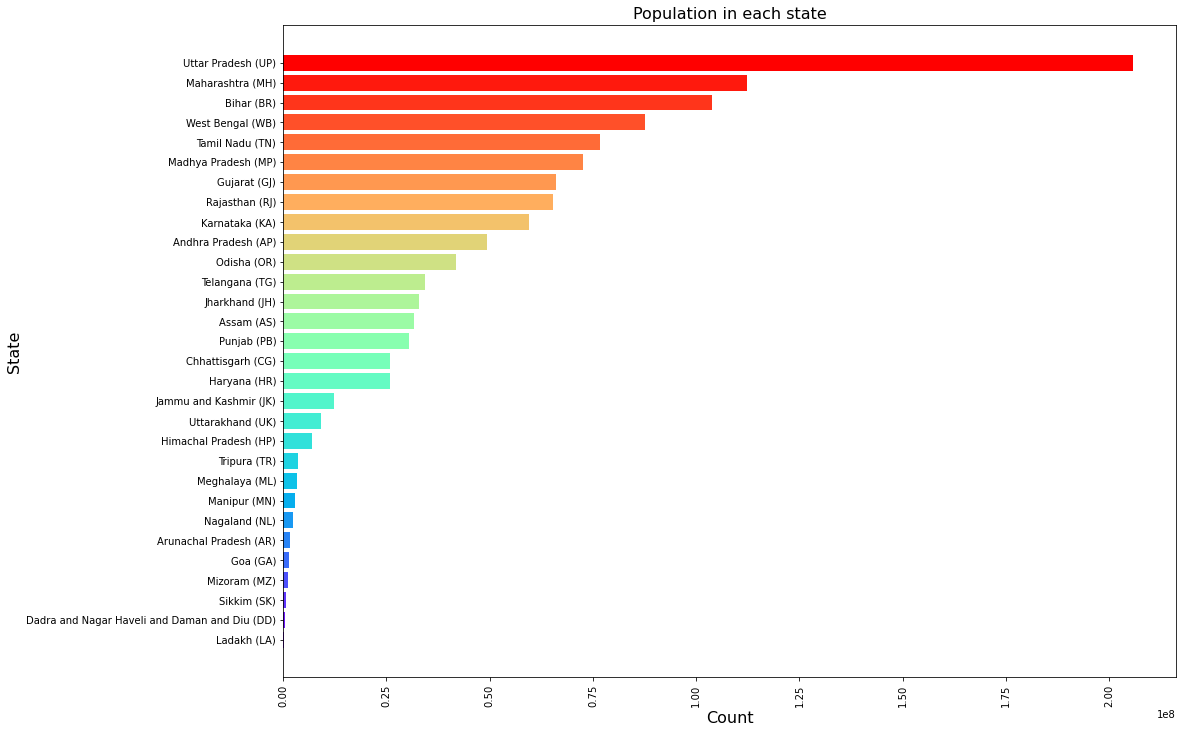

In [145]:
df_state.sort_values('Population',inplace=True)
population = df_state['Population']
state = df_state['State']


colors = cm.rainbow(np.linspace(0, 1, len(population.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("Count", fontsize = 16)
plt.ylabel("State", fontsize = 16)
plt.title("Population in each state", fontsize = 16)
plt.barh(state, population.values, color = colors)

## Obtain latitude and longitude of the given state

In [153]:
state = input('Enter a State - ')


Enter a State - Karnataka (KA)


In [154]:

geolocator = Nominatim(user_agent="tourist_explorist")
location = geolocator.geocode(state)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of ' + state + ' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Karnataka (KA) are 12.3084901, 76.6639936.


# foursquare API

In [101]:
# @hidden_cell

CLIENT_ID = 'your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret' # your Foursquare Secret
VERSION = 'api version' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NJU1LHWR0GIHZQ3Q2EPHJ0ORZ5BJCVVLQGT4TMI1EDNAYVAG
CLIENT_SECRET:0XIENH1G53A0BXJKCSLA5UGSLWODCZ3BYMD241BLXBERTYIW


#### Create a map of State with districts superimposed on top

In [155]:
state = input('Enter a State - ')

Enter a State - Karnataka (KA)


In [156]:

#dataframe containing only the state which is input by the user
df_user_state = new_df[new_df['State']==state].reset_index(drop=True)
df_user_state.head()

,State,Code,District,Headquarters,Population,Area,Density,Latitude,Longitude
0,Karnataka (KA),BK,Bagalkot,Bagalkot,1890826.0,6583.0,288.0,16.185317,75.696792
1,Karnataka (KA),BL,Ballari,Ballari,1400970.0,4252.0,330.0,15.144633,76.915886
2,Karnataka (KA),BG,Belgaum,Belgaum,4778439.0,13415.0,356.0,15.857267,74.506934
3,Karnataka (KA),BR,Bangalore Rural,Bangalore,987257.0,2239.0,441.0,12.979120,77.591300
4,Karnataka (KA),BN,Bangalore Urban,Bangalore,9588910.0,2190.0,4378.0,12.979120,77.591300


In [157]:

#map of State using latitude and longitude values
map_state = folium.Map(location=[latitude, longitude], zoom_start=7)


# add markers to map
for lat, lng, st, district in zip(df_user_state['Latitude'], df_user_state['Longitude'], df_user_state['State'], df_user_state['District']):
    label = '{}, {}'.format(district, st)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_state)  
    
map_state

I used this below cell step again (just for confimation level)

In [165]:
# @hidden_cell

CLIENT_ID = 'your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret' # your Foursquare Secret
VERSION= '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: NJU1LHWR0GIHZQ3Q2EPHJ0ORZ5BJCVVLQGT4TMI1EDNAYVAG
CLIENT_SECRET:AWL5Y223VLLD1JKUTOWHKFD5B42FUKAEYOH0M5DAOFUGFKRC


## We need to retrieve only tourist places. Let's check all the categories present in Foursquare API

In [166]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)

category_results = requests.get(url).json()
category_results

{'meta': {'code': 200, 'requestId': '60702529af3c0f4ec9d1ce70'},
 'response': {'categories': [{'id': '4d4b7104d754a06370d81259',
    'name': 'Arts & Entertainment',
    'pluralName': 'Arts & Entertainment',
    'shortName': 'Arts & Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': [{'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4bf58dd8d48988d1e1931735',
      'name': 'A

In [167]:

#Lets check number of main categories and sub-categories present in Foursquare API

categories = len(category_results['response']['categories'])

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    print(venues)
    for j in range(len(category_results['response']['categories'][i]['categories'])):
        sub_venues = category_results['response']['categories'][i]['categories'][j]['name']
        print('\t\t' + sub_venues)

Arts & Entertainment
		Amphitheater
		Aquarium
		Arcade
		Art Gallery
		Bowling Alley
		Casino
		Circus
		Comedy Club
		Concert Hall
		Country Dance Club
		Disc Golf
		Escape Room
		Exhibit
		General Entertainment
		Go Kart Track
		Historic Site
		Karaoke Box
		Laser Tag
		Memorial Site
		Mini Golf
		Movie Theater
		Museum
		Music Venue
		Pachinko Parlor
		Performing Arts Venue
		Pool Hall
		Public Art
		Racecourse
		Racetrack
		Roller Rink
		Salsa Club
		Samba School
		Stadium
		Theme Park
		Tour Provider
		VR Cafe
		Water Park
		Zoo
College & University
		College Academic Building
		College Administrative Building
		College Auditorium
		College Bookstore
		College Cafeteria
		College Classroom
		College Gym
		College Lab
		College Library
		College Quad
		College Rec Center
		College Residence Hall
		College Stadium
		College Theater
		Community College
		Fraternity House
		General College & University
		Law School
		Medical School
		Sorority House
		Student Center
		Trade School
		U

In [168]:

all_categories = {}

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    all_categories[venues] = i

print(all_categories)

{'Arts & Entertainment': 0, 'College & University': 1, 'Event': 2, 'Food': 3, 'Nightlife Spot': 4, 'Outdoors & Recreation': 5, 'Professional & Other Places': 6, 'Residence': 7, 'Shop & Service': 8, 'Travel & Transport': 9}


# get required categories variables

In [169]:
tourist_category = []
business_category = []
req_categories = ['Arts & Entertainment', 'Nightlife Spot', 'Outdoors & Recreation']
req_categories2 = ['Food', 'Shop & Service', 'Travel & Transport']


for i in req_categories:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    tourist_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        tourist_category.append(sub_venues)

for i in req_categories2:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    business_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        business_category.append(sub_venues)

In [170]:
#remove unwanted categories from tourist list
tourist_category.remove('Lounge')
tourist_category.remove('Movie Theater')
tourist_category.remove('Bar')

#remove unwanted categories from business list
business_category.remove('Bus Station')
business_category.remove('ATM')
business_category.remove('Train Station')
business_category.remove('Bus Stop')
business_category.remove('Light Rail Station')
business_category.remove('Toll Booth')
business_category.remove('Toll Plaza')
business_category.remove('Tram Station')

## Function to get the nearby venues of all the districts in the State

In [171]:
LIMIT = 25

def getNearbyVenues_tourist(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    nearby_venues = nearby_venues[nearby_venues['Venue Category'].isin(tourist_category)]
    
    return(nearby_venues)

In [172]:
state_venues = getNearbyVenues_tourist(names=df_user_state['District'],
                                   latitudes=df_user_state['Latitude'],
                                   longitudes=df_user_state['Longitude']
                                  )

Bagalkot
Ballari
Belgaum
Bangalore Rural
Bangalore Urban
Bidar
Bijapur
Chamarajanagara
Chikkaballapura
Chikmagalur
Chitradurga
Dakshina Kannada
Davanagere
Dharwad
Gadag
Gulbarga
Hassan
Haveri
Kodagu
Kolar
Koppal
Mandya
Mysore
Raichur
Ramanagara
Shimoga
Tumakuru
Udupi
Uttara Kannada
Yadgir


In [173]:
print(state_venues.shape)
state_venues

(80, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bagalkot,16.185317,75.696792,Aihole,16.020952,75.881430,Historic Site
1,Bagalkot,16.185317,75.696792,Aihole Rock Cut Shiva Temple,16.021357,75.882536,Sculpture Garden
4,Bagalkot,16.185317,75.696792,Pattadakal - World Heritage Site,15.951226,75.816525,Historic Site
5,Bagalkot,16.185317,75.696792,Pattadakal Temple,15.950170,75.815833,Sculpture Garden
6,Bagalkot,16.185317,75.696792,Badami,15.923024,75.679630,Scenic Lookout
40,Bangalore Rural,12.979120,77.591300,Cubbon Park,12.977042,77.595277,Park
65,Bangalore Urban,12.979120,77.591300,Cubbon Park,12.977042,77.595277,Park
90,Bidar,17.914259,77.524533,Bidar Fort,17.920706,77.528372,Historic Site
93,Bijapur,16.826925,75.720105,Gol Gumbaz,16.827155,75.735692,Historic Site
101,Chamarajanagara,11.923696,76.938865,Somanathapuram Temple,12.276613,76.882684,Historic Site


In [174]:

all_venues = state_venues['Venue'].tolist()
len(all_venues)

80

In [175]:
no_venues_in_district = state_venues.groupby('District', as_index=False).count()
no_venues_in_district = no_venues_in_district[['District','Venue']]
no_venues_in_district.rename(columns={'Venue':'No of Venues'}, inplace=True)
no_venues_in_district

,District,No of Venues
0,Bagalkot,5
1,Bangalore Rural,1
2,Bangalore Urban,1
3,Bidar,1
4,Bijapur,1
5,Chamarajanagara,9
6,Chikkaballapura,6
7,Chikmagalur,8
8,Chitradurga,2
9,Dharwad,1


In [176]:

max_no_of_venues = no_venues_in_district['No of Venues'].max()
max_no_of_venues

9


## Count number of venues retrieved in each District

<BarContainer object of 22 artists>

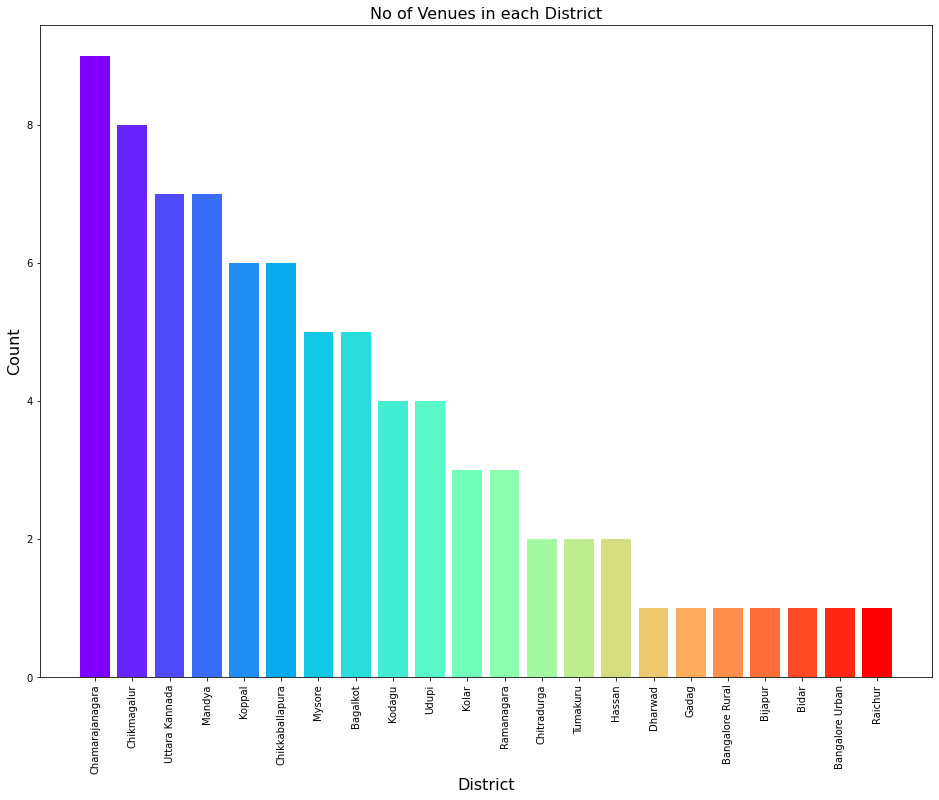

In [177]:
no_venues_in_district.sort_values('No of Venues', ascending=False, inplace=True)
venues = no_venues_in_district['No of Venues']
district = no_venues_in_district['District']


colors = cm.rainbow(np.linspace(0, 1, len(venues.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("District", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("No of Venues in each District", fontsize = 16)
plt.bar(district, venues.values, color = colors)

### Unique categories curated from all the returned venues

In [178]:
print('There are {} uniques categories.'.format(len(state_venues['Venue Category'].unique())))

There are 22 uniques categories.


In [179]:

#print unique venue categories
state_venues['Venue Category'].unique()

array(['Historic Site', 'Sculpture Garden', 'Scenic Lookout', 'Park',
       'National Park', 'Mountain', 'Other Great Outdoors', 'Brewery',
       'Farm', 'Trail', 'Castle', 'Campground', 'Palace', 'Exhibit',
       'Zoo', 'River', 'Theme Park', 'Performing Arts Venue',
       'Outdoors & Recreation', 'Garden', 'Island', 'Beach'], dtype=object)

## Analyze Each District

In [180]:

# one hot encoding
state_venues_onehot = pd.get_dummies(state_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
state_venues_onehot['District'] = state_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [state_venues_onehot.columns[-1]] + list(state_venues_onehot.columns[:-1])
state_venues_onehot = state_venues_onehot[fixed_columns]

state_venues_onehot.head()

,District,Beach,Brewery,Campground,Castle,Exhibit,Farm,Garden,Historic Site,Island,Mountain,National Park,Other Great Outdoors,Outdoors & Recreation,Palace,Park,Performing Arts Venue,River,Scenic Lookout,Sculpture Garden,Theme Park,Trail,Zoo
0,Bagalkot,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bagalkot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Bagalkot,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Bagalkot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,Bagalkot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [181]:
state_venues_onehot.shape

(80, 23)


### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [182]:
state_venues_grouped = state_venues_onehot.groupby('District').mean().reset_index()
state_venues_grouped

,District,Beach,Brewery,Campground,Castle,Exhibit,Farm,Garden,Historic Site,Island,Mountain,National Park,Other Great Outdoors,Outdoors & Recreation,Palace,Park,Performing Arts Venue,River,Scenic Lookout,Sculpture Garden,Theme Park,Trail,Zoo
0,Bagalkot,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.400000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.200000,0.4,0.000000,0.000,0.000000
1,Bangalore Rural,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000
2,Bangalore Urban,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000
3,Bidar,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000
4,Bijapur,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000
5,Chamarajanagara,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.222222,0.00,0.111111,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.333333,0.0,0.000000,0.000,0.000000
6,Chikkaballapura,0.000000,0.333333,0.0,0.0,0.000000,0.166667,0.00,0.000000,0.00,0.166667,0.000000,0.166667,0.0,0.000000,0.166667,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000
7,Chikmagalur,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.375000,0.00,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.125,0.000000
8,Chitradurga,0.000000,0.000000,0.0,0.5,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.500000,0.0,0.000000,0.000,0.000000
9,Dharwad,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000


In [183]:
state_venues_grouped.shape

(22, 23)

#### Print each District along with the top 5 most common venues

In [184]:

num_top_venues = max_no_of_venues

for hood in state_venues_grouped['District']:
    print("----"+hood+"----")
    temp = state_venues_grouped[state_venues_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bagalkot----
                   venue  freq
0  Sculpture Garden       0.4 
1  Historic Site          0.4 
2  Scenic Lookout         0.2 
3  Beach                  0.0 
4  Outdoors & Recreation  0.0 
5  Trail                  0.0 
6  Theme Park             0.0 
7  River                  0.0 
8  Performing Arts Venue  0.0 


----Bangalore Rural----
                   venue  freq
0  Park                   1.0 
1  Beach                  0.0 
2  Brewery                0.0 
3  Trail                  0.0 
4  Theme Park             0.0 
5  Sculpture Garden       0.0 
6  Scenic Lookout         0.0 
7  River                  0.0 
8  Performing Arts Venue  0.0 


----Bangalore Urban----
                   venue  freq
0  Park                   1.0 
1  Beach                  0.0 
2  Brewery                0.0 
3  Trail                  0.0 
4  Theme Park             0.0 
5  Sculpture Garden       0.0 
6  Scenic Lookout         0.0 
7  River                  0.0 
8  Performing Arts Venue  0.0 



#### Put this into a pandas dataframe

In [185]:

#function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [186]:

#create the new dataframe and display the top 10 venues for each district

num_top_venues = max_no_of_venues

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue Category'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = state_venues_grouped['District']

for ind in np.arange(state_venues_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(state_venues_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category
0,Bagalkot,Sculpture Garden,Historic Site,Scenic Lookout,Zoo,Mountain,Brewery,Campground,Castle,Exhibit
1,Bangalore Rural,Park,Zoo,Mountain,Brewery,Campground,Castle,Exhibit,Farm,Garden
2,Bangalore Urban,Park,Zoo,Mountain,Brewery,Campground,Castle,Exhibit,Farm,Garden
3,Bidar,Historic Site,Zoo,Trail,Brewery,Campground,Castle,Exhibit,Farm,Garden
4,Bijapur,Historic Site,Zoo,Trail,Brewery,Campground,Castle,Exhibit,Farm,Garden


In [187]:

venue_venue_category = state_venues.groupby(['District', 'Venue Category'], as_index=False).agg(lambda x: ", ".join(x))
venue_venue_category.head()

,District,Venue Category,Venue
0,Bagalkot,Historic Site,"Aihole, Pattadakal - World Heritage Site"
1,Bagalkot,Scenic Lookout,Badami
2,Bagalkot,Sculpture Garden,"Aihole Rock Cut Shiva Temple, Pattadakal Temple"
3,Bangalore Rural,Park,Cubbon Park
4,Bangalore Urban,Park,Cubbon Park


In [188]:

r, c = district_venues_sorted.shape

for rows in range(r):
    a = district_venues_sorted.iloc[rows, 0]
    for col, col_name in enumerate(district_venues_sorted.columns[1:]):
        b = district_venues_sorted.iloc[rows, col+1]
        pf = venue_venue_category[venue_venue_category['District'].str.contains(a) & venue_venue_category['Venue Category'].str.contains(b)]
        if not pf.empty:
            #print(b)
            idx = pf['Venue'].index.values.astype(int)[0]
            ven = pf['Venue'][idx]
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ven
        elif pf.empty:
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ''

## Most common venues according to venue category in each District

In [189]:
indicators = ['st', 'nd', 'rd']
new = []

for ind in np.arange(max_no_of_venues):
    try:
        new.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        new.append('{}th Most Common Venue'.format(ind+1))

district_venues_sorted.columns = district_venues_sorted.columns[:1].tolist() + new

In [190]:
district_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
0,Bagalkot,"Aihole Rock Cut Shiva Temple, Pattadakal Temple","Aihole, Pattadakal - World Heritage Site",Badami,,,,,,
1,Bangalore Rural,Cubbon Park,,,,,,,,
2,Bangalore Urban,Cubbon Park,,,,,,,,
3,Bidar,Bidar Fort,,,,,,,,
4,Bijapur,Gol Gumbaz,,,,,,,,
5,Chamarajanagara,"Bandipur National Park, Bandipur National Park, Bandipur National Park","Chamundi Hill, Shivasamudram Falls, Bharachukki Falls","Somanathapuram Temple, Talakad",Kodanadu View Point,,,,,
6,Chikkaballapura,"Windmills Craftswork, The Druid Garden",nandi hills,Our Native Village,Richard's Park,Nandi Hills,,,,
7,Chikmagalur,"Mullainagiri, Charmadi Ghat, Shiradi Ghat, The Western Ghats","Channakeshwara Temple, Hoysaleshwara Temple, Halebeedu",Mullayanagiri,,,,,,
8,Chitradurga,Pune-bangalore Highway,Chitradurga Fort,,,,,,,
9,Dharwad,Dandeli,,,,,,,,


# Get Nearby Businesses

In [191]:
LIMIT = 25

def getNearbyBusiness(names, latitudes, longitudes, radius=500):
    
    business_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby business
        business_list.append([(name,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_business = pd.DataFrame([item for business_list in business_list for item in business_list])
    nearby_business.columns = ['Venue',
                    'Business', 
                  'BLatitude', 
                  'BLongitude', 
                  'Business Category']
    
    nearby_business = nearby_business[nearby_business['Business Category'].isin(business_category)]
    
    return(nearby_business)

In [194]:
nearby_business = getNearbyBusiness(names=state_venues['Venue'],
                                   latitudes=state_venues['Venue Latitude'],
                                   longitudes=state_venues['Venue Longitude']
                                  )

Aihole
Aihole Rock Cut Shiva Temple
Pattadakal - World Heritage Site
Pattadakal Temple
Badami
Cubbon Park
Cubbon Park
Bidar Fort
Gol Gumbaz
Somanathapuram Temple
Chamundi Hill
Shivasamudram Falls
Bandipur National Park
Talakad
Bharachukki Falls
Kodanadu View Point
Bandipur National Park
Bandipur National Park
Nandi Hills
nandi hills
Windmills Craftswork
The Druid Garden
Richard's Park
Our Native Village
Mullayanagiri
Channakeshwara Temple
Hoysaleshwara Temple
Halebeedu
Mullainagiri
Charmadi Ghat
Shiradi Ghat
The Western Ghats
Chitradurga Fort
Pune-bangalore Highway
Dandeli
K.H.PATIL KRISHI VIGYANKENDRA
Central Park of Maple Grove
Elm Creek Park Reserve
Raja's seat
Madekeri Fort
Kukke Subramanya Temple
Abbey Falls
Windmills Craftworks
Windmills Craftswork
nandi hills
Hampi
Hanuman Temple
Lotus Mahal
Martanga Hill
Vitthala temple
Queens Bath
Tipu Sultan's Summer Palace
Dariya Daulat Bagh
Somanathapuram Temple
Mysore Palace
Sri Chamarajendra Zoological Gardens - Mysore Zoo
Mysore Zoo
Cham

In [195]:
print(nearby_business.shape)
nearby_business

(230, 5)


,Venue,Business,BLatitude,BLongitude,Business Category
14,Badami,Geeta Darshini,15.924083,75.679891,Breakfast Spot
15,Badami,Royal Enfield Showroom,15.924556,75.678835,Motorcycle Shop
25,Cubbon Park,Subway,12.976016,77.597939,Sandwich Place
28,Cubbon Park,McDonald's,12.976011,77.598391,Fast Food Restaurant
31,Cubbon Park,Jewels De Paragon,12.976793,77.599198,Jewelry Store
32,Cubbon Park,Chancery Pan Walla,12.976029,77.599620,Food Truck
39,Cubbon Park,Subway,12.976016,77.597939,Sandwich Place
42,Cubbon Park,McDonald's,12.976011,77.598391,Fast Food Restaurant
45,Cubbon Park,Jewels De Paragon,12.976793,77.599198,Jewelry Store
46,Cubbon Park,Chancery Pan Walla,12.976029,77.599620,Food Truck


In [196]:
no_nearby_business = nearby_business.groupby('Business Category', as_index=False).count()
no_nearby_business = no_nearby_business[['Business Category','Business']]
no_nearby_business.rename(columns={'Business':'No of Businesses'}, inplace=True)
no_nearby_business

,Business Category,No of Businesses
0,Airport,2
1,Asian Restaurant,3
2,BBQ Joint,2
3,Bakery,2
4,Bistro,1
5,Breakfast Spot,4
6,Bubble Tea Shop,1
7,Café,33
8,Coffee Shop,13
9,Comfort Food Restaurant,1


In [197]:
print('There are {} uniques categories.'.format(len(nearby_business['Business Category'].unique())))

There are 44 uniques categories.


## Perform one-hot encoding of the business categories retrieved

In [198]:

# one hot encoding
nearby_business_onehot = pd.get_dummies(nearby_business[['Business Category']], prefix="", prefix_sep="")

# add venue column back to dataframe
nearby_business_onehot['Venue'] = nearby_business['Venue'] 

# move venue column to the first column
fixed_columns = [nearby_business_onehot.columns[-1]] + list(nearby_business_onehot.columns[:-1])
nearby_business_onehot = nearby_business_onehot[fixed_columns]

nearby_business_onehot.head()

,Venue,Airport,Asian Restaurant,BBQ Joint,Bakery,Bistro,Breakfast Spot,Bubble Tea Shop,Café,Coffee Shop,Comfort Food Restaurant,Convenience Store,Department Store,Diner,Dry Cleaner,Duty-free Shop,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food Court,Food Truck,Gastropub,Halal Restaurant,Hotel,Indian Restaurant,Italian Restaurant,Jewelry Store,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Motorcycle Shop,Pharmacy,Pizza Place,Rest Area,Restaurant,Sandwich Place,Seafood Restaurant,Smoke Shop,Snack Place,Spanish Restaurant,Swiss Restaurant,Tea Room,Vegetarian / Vegan Restaurant
14,Badami,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,Badami,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
25,Cubbon Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
28,Cubbon Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,Cubbon Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [199]:

nearby_business_onehot.shape

(230, 45)

### Group rows by venues and by taking the mean of the frequency of occurrence of each category

In [200]:
nearby_business_grouped = nearby_business_onehot.groupby('Venue').mean().reset_index()
nearby_business_grouped

,Venue,Airport,Asian Restaurant,BBQ Joint,Bakery,Bistro,Breakfast Spot,Bubble Tea Shop,Café,Coffee Shop,Comfort Food Restaurant,Convenience Store,Department Store,Diner,Dry Cleaner,Duty-free Shop,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food Court,Food Truck,Gastropub,Halal Restaurant,Hotel,Indian Restaurant,Italian Restaurant,Jewelry Store,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Motorcycle Shop,Pharmacy,Pizza Place,Rest Area,Restaurant,Sandwich Place,Seafood Restaurant,Smoke Shop,Snack Place,Spanish Restaurant,Swiss Restaurant,Tea Room,Vegetarian / Vegan Restaurant
0,Abbey Falls,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.500000,0.500000,0.000000,0.00,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,Agonda Beach,0.000000,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.100000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.1,0.000000,0.000000,0.200000,0.100000,0.00,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.100000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,0.0,0.100000
2,Badami,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.5,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,Bandipur National Park,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,Channakeshwara Temple,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.00,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,Charmadi Ghat,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.5,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.00,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,Cola Beach,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.00,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,Cubbon Park,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,0.0,0.000,0.000000,0.250000,0.0,0.000000,0.000000,0.000000,0.000000,0.25,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,Dandeli,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.00,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,Dariya Daulat Bagh,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000

In [201]:
nearby_business_grouped.shape

(41, 45)

### Print each venue along with the top 5 most common business

In [202]:

num_top_business = 5

for hood in nearby_business_grouped['Venue']:
    print("----"+hood+"----")
    temp = nearby_business_grouped[nearby_business_grouped['Venue'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_business))
    print('\n')

----Abbey Falls----
                venue  freq
0  Hotel               0.5 
1  Indian Restaurant   0.5 
2  Airport             0.0 
3  Asian Restaurant    0.0 
4  Italian Restaurant  0.0 


----Agonda Beach----
                venue  freq
0  Indian Restaurant   0.2 
1  Gastropub           0.1 
2  Café                0.1 
3  Snack Place         0.1 
4  Seafood Restaurant  0.1 


----Badami----
               venue  freq
0  Breakfast Spot     0.5 
1  Motorcycle Shop    0.5 
2  Airport            0.0 
3  Pizza Place        0.0 
4  Indian Restaurant  0.0 


----Bandipur National Park----
               venue  freq
0  Rest Area          1.0 
1  Airport            0.0 
2  Pharmacy           0.0 
3  Hotel              0.0 
4  Indian Restaurant  0.0 


----Channakeshwara Temple----
                venue  freq
0  Indian Restaurant   1.0 
1  Airport             0.0 
2  Asian Restaurant    0.0 
3  Hotel               0.0 
4  Italian Restaurant  0.0 


----Charmadi Ghat----
                venue  

#### Put this into a pandas dataframe

In [203]:
#function to sort the business in descending order

def return_most_common_business(row, num_top_business):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_business]

In [204]:
num_top_business = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top business
columns = ['Venue']
for ind in np.arange(num_top_business):
    try:
        columns.append('{}{} Most Common Business'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Business'.format(ind+1))

# create a new dataframe
nearby_business_sorted = pd.DataFrame(columns=columns)
nearby_business_sorted['Venue'] = nearby_business_grouped['Venue']

for ind in np.arange(nearby_business_grouped.shape[0]):
    nearby_business_sorted.iloc[ind, 1:] = return_most_common_business(nearby_business_grouped.iloc[ind, :], num_top_business)

nearby_business_sorted.head()

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
0,Abbey Falls,Hotel,Indian Restaurant,Vegetarian / Vegan Restaurant,Department Store,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner
1,Agonda Beach,Indian Restaurant,Vegetarian / Vegan Restaurant,Snack Place,Gastropub,Seafood Restaurant,Bistro,Restaurant,Café,Italian Restaurant,Department Store
2,Badami,Motorcycle Shop,Breakfast Spot,Vegetarian / Vegan Restaurant,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner,Diner
3,Bandipur National Park,Rest Area,Vegetarian / Vegan Restaurant,Convenience Store,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner,Diner
4,Channakeshwara Temple,Indian Restaurant,Vegetarian / Vegan Restaurant,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner,Diner


# Perform Clustering

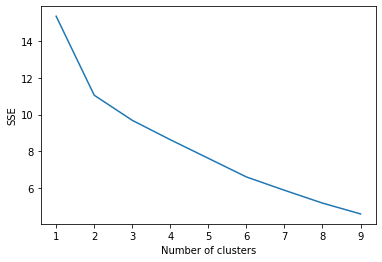

In [205]:

sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(nearby_business_grouped.drop('Venue',axis=1))
    nearby_business_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

### Use the optimal k value obtained from the above graph

In [206]:

#Run k-means to cluster the neighborhood into 5 clusters

# set number of clusters
kclusters = 3

nearby_business_grouped_clustering = nearby_business_grouped.drop('Venue', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nearby_business_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 2, 1, 1, 1, 2, 1, 0], dtype=int32)

In [207]:

#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

# add clustering labels
nearby_business_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nearby_business_merged = nearby_business[['Venue']]
new_state_venues = state_venues[['Venue', 'Venue Latitude', 'Venue Longitude']]

nearby_business_merged = nearby_business_merged.join(new_state_venues.set_index('Venue'), on='Venue')

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nearby_business_merged = nearby_business_merged.join(nearby_business_sorted.set_index('Venue'), on='Venue')

nearby_business_merged.drop_duplicates(subset='Venue', keep='first', inplace=True)
nearby_business_merged

,Venue,Venue Latitude,Venue Longitude,Cluster Labels,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
14,Badami,15.923024,75.679630,1,Motorcycle Shop,Breakfast Spot,Vegetarian / Vegan Restaurant,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner,Diner
25,Cubbon Park,12.977042,77.595277,2,Food Truck,Fast Food Restaurant,Sandwich Place,Jewelry Store,Convenience Store,Fish & Chips Shop,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner
51,Gol Gumbaz,16.827155,75.735692,1,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Department Store,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner
59,Bandipur National Park,11.691771,76.637168,2,Rest Area,Vegetarian / Vegan Restaurant,Convenience Store,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner,Diner
62,Talakad,12.175401,77.026330,1,Indian Restaurant,Vegetarian / Vegan Restaurant,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner,Diner
69,Nandi Hills,13.368001,77.680911,0,Restaurant,Vegetarian / Vegan Restaurant,Convenience Store,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner,Diner
71,nandi hills,13.258274,77.701005,1,Indian Restaurant,Vegetarian / Vegan Restaurant,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner,Diner
73,Windmills Craftswork,13.199887,77.709638,1,Coffee Shop,Café,Vegetarian / Vegan Restaurant,Pizza Place,Duty-free Shop,Fast Food Restaurant,Hotel,Indian Restaurant,Italian Restaurant,Mediterranean Restaurant
98,The Druid Garden,13.063946,77.591492,1,Indian Restaurant,Pharmacy,Fast Food Restaurant,Bubble Tea Shop,Pizza Place,Convenience Store,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner
108,Richard's Park,13.004262,77.617396,1,BBQ Joint,Indian Restaurant,Bakery,Halal Restaurant,Café,Department Store,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Diner,Fast Food Restaurant


## Examine Clusters



Examine each cluster and determine the businesses that distinguish each cluster.

Cluster 1
    

In [213]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 0, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]


,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
69,Nandi Hills,Restaurant,Vegetarian / Vegan Restaurant,Convenience Store,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner,Diner
232,Hampi,Indian Restaurant,Restaurant,Café,Vegetarian / Vegan Restaurant,Department Store,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop
258,Tipu Sultan's Summer Palace,Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Convenience Store,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner
262,Dariya Daulat Bagh,Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Convenience Store,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner
320,Wonder La,Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Convenience Store,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner
352,Kunigal,Halal Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Convenience Store,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner
382,St Mary's Island,Seafood Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Convenience Store,Fish & Chips Shop,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner,Diner
436,Galgibaga,Seafood Restaurant,Vegetarian / Vegan Restaurant,Convenience Store,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner,Diner


#### Cluster 2

In [215]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 1, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
14,Badami,Motorcycle Shop,Breakfast Spot,Vegetarian / Vegan Restaurant,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner,Diner
51,Gol Gumbaz,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Department Store,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner
62,Talakad,Indian Restaurant,Vegetarian / Vegan Restaurant,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner,Diner
71,nandi hills,Indian Restaurant,Vegetarian / Vegan Restaurant,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner,Diner
73,Windmills Craftswork,Coffee Shop,Café,Vegetarian / Vegan Restaurant,Pizza Place,Duty-free Shop,Fast Food Restaurant,Hotel,Indian Restaurant,Italian Restaurant,Mediterranean Restaurant
98,The Druid Garden,Indian Restaurant,Pharmacy,Fast Food Restaurant,Bubble Tea Shop,Pizza Place,Convenience Store,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner
108,Richard's Park,BBQ Joint,Indian Restaurant,Bakery,Halal Restaurant,Café,Department Store,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Diner,Fast Food Restaurant
124,Mullayanagiri,Indian Restaurant,Market,Vegetarian / Vegan Restaurant,Department Store,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner
128,Channakeshwara Temple,Indian Restaurant,Vegetarian / Vegan Restaurant,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner,Diner
142,Charmadi Ghat,Convenience Store,Indian Restaurant,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner,Diner


### Cluster 3

In [216]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 2, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
25,Cubbon Park,Food Truck,Fast Food Restaurant,Sandwich Place,Jewelry Store,Convenience Store,Fish & Chips Shop,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner
59,Bandipur National Park,Rest Area,Vegetarian / Vegan Restaurant,Convenience Store,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner,Diner
122,Our Native Village,Dry Cleaner,Vegetarian / Vegan Restaurant,Tea Room,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop,Diner
313,Tungabhadra River,Food Truck,Hotel,Fast Food Restaurant,Food Court,Fish & Chips Shop,Electronics Store,Eastern European Restaurant,Duty-free Shop,Dry Cleaner,Diner
387,End Point,Hotel,Sandwich Place,Diner,Vegetarian / Vegan Restaurant,Convenience Store,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Duty-free Shop
